# Regressão Logística

<p>
    
    Modelo de Regressão Logística Múltipla
        𝑝 = 𝑒𝑏0+𝑏1𝑋1 + ... + 𝑏𝑘𝑋𝑘 / 1 + 𝑒𝑏0+𝑏1𝑋1 + ... + 𝑏𝑘𝑋𝑘
        - A variável resposta é categórica
        - Utiliza o cálculo de máxima verossimilhança para obtenção dos parâmetros
        - Se houver muitas classes é possivel criar agrupamentos
        - É um modelo probabilístico
        - Probabilidade é a frequência de um evento ocorrer e Chance é a relação entre a probabilidade de um evento ocorer e não ocorrer

    Interpretação de parâmetros - Razão de Chance
        Odds: Razão entre a probabilidade de um evento ocorrer e não ocorrer
        odds = p(evento) / 1-p(evento)
        Apenas a exponencial do parametro é interpretavel

    Dummie
        Para atributos categóricos deve-se criar Dummies
        Numero de dummies igual numero dee classes - 1
        utilizar n - 1 pelo principio da parcimonia e para evitar multicolinearidade
        apos criar as dummies, se alguma der nao significativa quer dizer que a media é igual a dummie que foi retirada
            
    Propósito de um modelo
        Ordenar: tem uma restricao clara de negocio (corte no volume)
            lyft (precision/tx de resposta): compara o quanto está sendo bom no pedaço/percentil quanto pegar aleatorio (* subtrair 1 para interpretar o valor da porcentagem *)
            Area AUC presente na curva ROC: Quanto maior a área, melhor o modelo
            KS: distancia entre 1 de todos os 1 e 0 de todos os 0 (observar o corte utilizado para maior valor de separacao entre 0 e 1)
        
        Decidir: a regra de negocio é negociavel (corte na probabilidade)
            recall: de todos os alvos quantos eu identifiquei (alcance)
            precision: de todos que eu afirmei quantos eu acertei (quanto eu acerto)
            acurácia : quanto o modelo acerta (medida pode ser ruim em casos de dados desbalanceados, nesse caso utilizar f1-score)
            Como essas medidas sao diretamente impactadas pela probabilidade de corte, é possivel simular varios cenarios com diferentes probabilidades com o objetivo de um modelo alinhado comma area de negocio
            
        Estimar: calcular um valor de probabilidade 
            (RMSE, AIC, BIC, ...)
    
</p>    

In [ ]:
# Anotação statsmodels
# odd = np.exp(modelo.params)
# params = modelo.params
# conf = modelo.conf_int()
# conf['Odds Ratio'] = params
# conf.columns = ['5%', '95%', 'Odds Ratio']
# print(np.exp(conf))

# Anotacao sklearn
# from sklearn.metrics import (confusion_matrix, accuracy_score)
# cm = confusion_matrix(x, yhat)
# acc = accuracy_score(y, yhat)

In [244]:
# Imports
import numpy as np
import pandas as pd
import statsmodels.api as sm

from sklearn.metrics import (confusion_matrix, accuracy_score, recall_score, precision_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns

# Exemplo 1 - Regressão Logística Simples

In [245]:
# Criar DataFrame
x = [55.3, 55.3, 55.3, 55.9, 55.9, 55.9, 55.9, 56.1, 56.1, 56.1, 56.1, 56.1, 56.1, 56.8,
    56.8, 57.0, 57.0, 57.0, 57.8, 57.8, 57.8, 57.9, 57.9, 57.9, 58.8, 58.8, 58.8, 59.8,
    59.8, 59.8, 62.2, 62.2, 65.3, 65.3, 65.3, 65.3, 68.7, 69.0, 73.0, 73.0, 63.8, 63.8,
    63.8, 63.9, 63.9, 63.9, 64.7, 64.7, 64.7, 65.1, 65.1, 65.1, 67.4, 67.4, 67.4, 67.4,
    68.7, 68.7, 68.7, 70.4, 70.4, 71.2, 71.2, 73.1, 73.1, 74.6, 74.6, 74.6, 74.6, 79.3,
    79.3, 79.3, 79.3, 79.3, 83.0, 83.0, 83.0]

y = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

df = pd.DataFrame({'x':x, 'y':y})

# Definir variavel preditora
x = df['x']

# Definir variavel respostas
y = df['y']

# Train logistic model
x = sm.add_constant(x)
model = sm.Logit(y, x).fit()

# Get predicted value
pred_logit = model.get_prediction()
df['p'] = pred_logit.summary_frame()['predicted']

# Display model information
print(model.summary())
print(f'\nOdds (Interpretação de parametros): \n{np.exp(model.params)}')

Optimization terminated successfully.
         Current function value: 0.255075
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   77
Model:                          Logit   Df Residuals:                       75
Method:                           MLE   Df Model:                            1
Date:                Tue, 16 Jan 2024   Pseudo R-squ.:                  0.6320
Time:                        02:45:48   Log-Likelihood:                -19.641
converged:                       True   LL-Null:                       -53.366
Covariance Type:            nonrobust   LLR p-value:                 2.161e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.9036      8.172      4.149      0.000      17.886      49.921
x             -0.5305      0.

In [246]:
# Modelo utilizado para Decidir
# Definir corte na probabilidade
p = 0.7
df['p'] = df['p'].apply(lambda x: 1 if x > p else 0)

# Matriz de confusão
cm = model.pred_table(threshold=p)
print(f'Matriz de confusão:\n {cm}')

# Recall
recall = round(recall_score(df['y'],df['p']), 2)

# Precision
precision = round(precision_score(df['y'],df['p']), 2)

# f-score
f1score = round(f1_score(df['y'], df['p']), 2)

# Accuracy
acc = round(accuracy_score(df['y'], df['p']), 2)

# Missclassification
mis = round(1 - acc, 2)

# Display model information
print(f'\nRecall: {recall}')
print(f'\nPrecision: {precision}')
print(f'\nf-score: {f1score}')
print(f'\nMissclassification: {mis}')
print(f'\nAccuracy: {acc}')

Matriz de confusão:
 [[39.  0.]
 [ 6. 32.]]

Recall: 0.84

Precision: 1.0

f-score: 0.91

Missclassification: 0.08

Accuracy: 0.92


# Exemplo 2. Regressão Logística Múltipla

In [247]:
# Criar DataFrame
df = pd.read_sas('dados/titanic.sas7bdat')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1309 non-null   object 
 1   Age       1046 non-null   float64
 2   Gender    1309 non-null   object 
 3   Class     1309 non-null   float64
 4   Fare      1308 non-null   float64
 5   Survival  1309 non-null   float64
dtypes: float64(4), object(2)
memory usage: 61.5+ KB


In [248]:
# Eliminar nulos
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1045 non-null   object 
 1   Age       1045 non-null   float64
 2   Gender    1045 non-null   object 
 3   Class     1045 non-null   float64
 4   Fare      1045 non-null   float64
 5   Survival  1045 non-null   float64
dtypes: float64(4), object(2)
memory usage: 57.1+ KB


In [249]:
# Definir tipo das variaveis
df['Gender'] = df['Gender'].astype('category')
df['Class'] = df['Class'].astype('category')
df['Survival'] = df['Survival'].astype('category')
df['Age'] = df['Age'].astype('int')
df.head()

,Name,Age,Gender,Class,Fare,Survival
0,"b'Allen, Miss. Elisabeth Walton'",29,b'Female',1.0,211.34,1.0
1,"b'Allison, Master. Hudson Trevor'",1,b'Male',1.0,151.55,1.0
2,"b'Allison, Miss. Helen Loraine'",2,b'Female',1.0,151.55,0.0
3,"b'Allison, Mr. Hudson Joshua Creighton'",30,b'Male',1.0,151.55,0.0
4,"b'Allison, Mrs. Hudson J C (Bessie Waldo Danie...",25,b'Female',1.0,151.55,0.0


In [250]:
# Criar dummies
df['Gender_F'] = df['Gender'].apply(lambda x: 1 if x == b'Female' else 0)
df['Class_1'] = df['Class'].apply(lambda x: 1 if x == 1 else 0)
df['Class_2'] = df['Class'].apply(lambda x: 1 if x == 2 else 0)
df = df.drop(columns=['Gender', 'Class'])
df.head()

,Name,Age,Fare,Survival,Gender_F,Class_1,Class_2
0,"b'Allen, Miss. Elisabeth Walton'",29,211.34,1.0,1,1,0
1,"b'Allison, Master. Hudson Trevor'",1,151.55,1.0,0,1,0
2,"b'Allison, Miss. Helen Loraine'",2,151.55,0.0,1,1,0
3,"b'Allison, Mr. Hudson Joshua Creighton'",30,151.55,0.0,0,1,0
4,"b'Allison, Mrs. Hudson J C (Bessie Waldo Danie...",25,151.55,0.0,1,1,0


Optimization terminated successfully.
         Current function value: 0.469957
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survival   No. Observations:                 1045
Model:                          Logit   Df Residuals:                     1039
Method:                           MLE   Df Model:                            5
Date:                Tue, 16 Jan 2024   Pseudo R-squ.:                  0.3052
Time:                        02:46:17   Log-Likelihood:                -491.11
converged:                       True   LL-Null:                       -706.79
Covariance Type:            nonrobust   LLR p-value:                 5.147e-91
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2686      0.205     -6.190      0.000      -1.670      -0.867
Age           -0.0343      0.

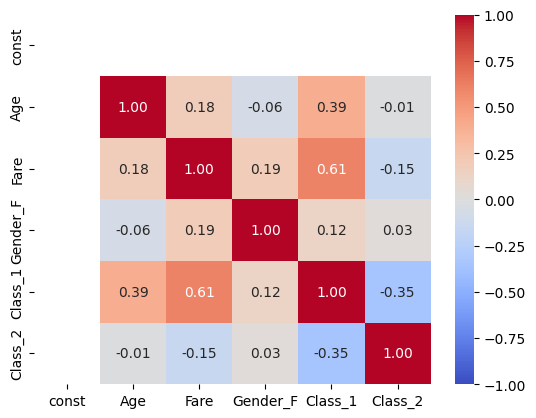

In [251]:
# Select attributes
x = df[['Age', 'Fare', 'Gender_F', 'Class_1', 'Class_2']]

# Definir variavel respostas
y = df['Survival']

# Train logistic model
x = sm.add_constant(x)
model = sm.Logit(y, x).fit()

# Get predicted value
pred_logit = model.get_prediction()
df['p'] = pred_logit.summary_frame()['predicted']

# Display model information
print(model.summary())
print(f'\nOdds (Interpretação de parametros): \n{np.exp(model.params)}')

# Check correlation between attributes
sns.heatmap(x.corr(), cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show();

Optimization terminated successfully.
         Current function value: 0.469975
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survival   No. Observations:                 1045
Model:                          Logit   Df Residuals:                     1040
Method:                           MLE   Df Model:                            4
Date:                Tue, 16 Jan 2024   Pseudo R-squ.:                  0.3051
Time:                        02:35:42   Log-Likelihood:                -491.12
converged:                       True   LL-Null:                       -706.79
Covariance Type:            nonrobust   LLR p-value:                 4.733e-92
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2632      0.203     -6.224      0.000      -1.661      -0.865
Age           -0.0344      0.

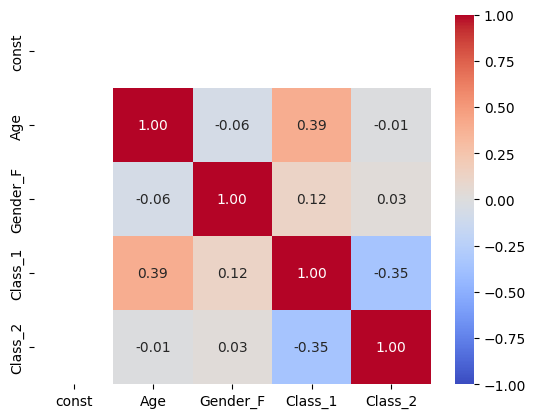

In [232]:
# Retirar Fare pois tem p-valor maior que 0,5
# Select attributes
x = df[['Age', 'Gender_F', 'Class_1', 'Class_2']]

# Definir variavel respostas
y = df['Survival']

# Train logistic model
x = sm.add_constant(x)
model = sm.Logit(y, x).fit()

# Get predicted value
pred_logit = model.get_prediction()
df['p'] = pred_logit.summary_frame()['predicted']

# Display model information
print(model.summary())
print(f'\nOdds (Interpretação de parametros): \n{np.exp(model.params)}')

# Check correlation between attributes
sns.heatmap(x.corr(), cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show();

In [252]:
# Modelo utilizado para Decidir
# Definir corte na probabilidade
p = 0.7
df['p'] = df['p'].apply(lambda x: 1 if x > p else 0)

# Matriz de confusão
cm = model.pred_table(threshold=p)
print(f'Matriz de confusão:\n {cm}')

# Recall
recall = round(recall_score(df['Survival'],df['p']), 2)

# Precision
precision = round(precision_score(df['Survival'],df['p']), 2)

# f-score
f1score = round(f1_score(df['Survival'],df['p']), 2)

# Accuracy
acc = round(accuracy_score(df['Survival'], df['p']), 2)

# Missclassification
mis = round(1 - acc, 2)

# Display model information
print(f'\nRecall: {recall}')
print(f'\nPrecision: {precision}')
print(f'\nf-score: {f1score}')
print(f'\nMissclassification: {mis}')
print(f'\nAccuracy: {acc}')

Matriz de confusão:
 [[589.  29.]
 [204. 223.]]

Recall: 0.52

Precision: 0.88

f-score: 0.66

Missclassification: 0.22

Accuracy: 0.78
